In [2]:
import numpy as np

class two_step_mdp():
    def __init__(self, tranprob = 0.75, rewprob = 0.9):
        self.state_space = (0,)
        self.action_space = (0, 1)
        self.COMMON = True
        self.RARE = False
        self.state = 0
        self.tran_prob = tranprob
        self.rew_prob = rewprob
        self.transition = {0: lambda: (1, self.COMMON) if np.random.rand(1) < self.tran_prob else (2, self.RARE),
                    1: lambda: (2, self.COMMON) if np.random.rand(1) < self.tran_prob else (1, self.RARE)}
        self.reward = {1: lambda: 1 if np.random.rand(1) < self.rew_prob else 0,
                    2: lambda: 1 if np.random.rand(1) < 1 - self.rew_prob else 0}
        self.original = True
        #self.switch()
        
    def get_state(self):
        return self.state
    
    def get_reward(self):
        return self.reward[self.state]()
    
    def step(self, action):
        self.state, common = self.transition[action]()
        return self.state, self.reward[self.state](), common
    
    def rand_step(self):
        #self.state = self.transition[((np.random.random(1)<0.5)[0])]()
        #return self.state, self.reward[self.state]()
        return (np.random.random(1)<0.5)[0]

    def reset(self):
        self.state = 0
        return self.state
    
    def switch(self):
        self.rew_prob = (1-self.rew_prob) if (np.random.random(1)<0.5)[0] else self.rew_prob
        self.original = not self.original
        return self.original


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:73: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:76: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future


0.913242009132
0.771676300578
0.340572556762
0.405472636816


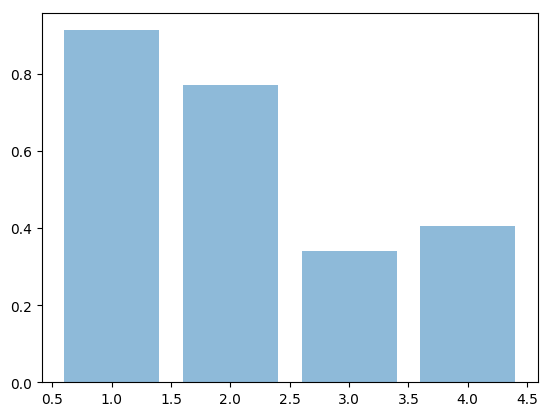

In [7]:
import matplotlib.pyplot as plt; plt.rcdefaults()

game = two_step_mdp()

#Initialize table with all zeros
Q = np.zeros([len(game.state_space), len(game.action_space)])

# Set learning parameters
lr = 1
y = 1
num_trials = 100
num_episodes = 200

stayNumCommReward=0
stayNumCommNoReward=0
stayNumRareReward=0
stayNumRareNoReward=0
numCommRewarded=0
numCommNotRewarded=0
numRareRewarded=0
numRareNotRewarded=0

val_state1 = 0
val_state2 = 0

e=0.7
#create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    #Reset environment and get first new observation
    orig = game.switch()
    rAll = 0
    #print("-----")
    #The Q-Table learning algorithm
    for j in range(num_trials):
        exploring = False
        #print(orig)
        #print(Q)
        #e = 10/(i*num_trials + j + 1)
        #print(e)
        s=game.reset()
        #print(s)
        #Choose an action by greedily (with noise) picking from Q table
        #axn = np.argmax(Q[s,:] + np.random.randn(1, len(game.action_space))*(1./(i+1)))
        axn = np.argmax(Q[s,:])
        if np.random.rand(1)<e:
            axn = game.rand_step() 
            exploring = True
        if (i>0 or j>0) and not exploring: #if j==1:
            if rwd:      
                if comm:
                    stayNumCommReward += 1 if prev_axn == axn else 0
                    numCommRewarded += 1
                else:
                    stayNumRareReward += 1 if prev_axn == axn else 0
                    numRareRewarded += 1
            else:
                if comm:
                    stayNumCommNoReward += 1 if prev_axn == axn else 0
                    numCommNotRewarded += 1
                else:
                    stayNumRareNoReward += 1 if prev_axn == axn else 0
                    numRareNotRewarded += 1
                    
        #Get new state and reward from environment
        s1, rwd, comm = game.step(axn)
        prev_axn = axn
        #print(axn)
        #print(s)
        #Update Q-Table with new knowledge
        if s1 == 1:
            val_state1 = val_state1 + lr*(rwd - val_state1)
            Q[s,axn] = Q[s,axn] + lr*(y*val_state1 - Q[s,axn]) # + y*np.max(Q[s1,:])
        elif s1 == 2:
            val_state2 = val_state2 + lr*(rwd - val_state2)
            Q[s,axn] = Q[s,axn] + lr*(y*val_state2 - Q[s,axn]) # + y*np.max(Q[s1,:])
        rAll += rwd

    rList.append(rAll)

b1 = stayNumCommReward/(1.0*numCommRewarded)
b2 = stayNumRareReward/(1.0*numRareRewarded)
b3 = stayNumCommNoReward/(1.0*numCommNotRewarded)
b4 = stayNumRareNoReward/(1.0*numRareNotRewarded)

print b1
print b2
print b3
print b4

#print stayNumCommReward
#print stayNumRareReward
#print stayNumCommNoReward
#print stayNumRareNoReward

#print numCommRewarded
#print numRareRewarded
#print numCommNotRewarded
#print numRareNotRewarded

 
plt.bar([1, 2, 3, 4], [b1, b2, b3, b4], align='center', alpha=0.5)
plt.show()

0.942045035068
0.157804459691
0.171693735499
0.960300429185


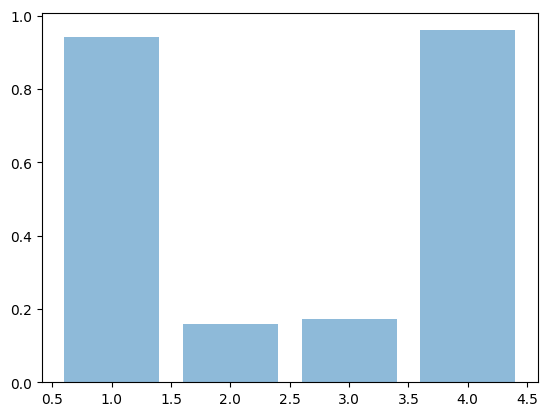

In [55]:
import matplotlib.pyplot as plt; plt.rcdefaults()

game = two_step_mdp()

#Initialize table with all zeros
Q = np.zeros([len(game.state_space), len(game.action_space)])

# Set learning parameters
lr = 0.9
y = 1
num_trials = 100
num_episodes = 200

stayNumCommReward=0
stayNumCommNoReward=0
stayNumRareReward=0
stayNumRareNoReward=0
numCommRewarded=0
numCommNotRewarded=0
numRareRewarded=0
numRareNotRewarded=0


val_state1 = 0
val_state2 = 0

e=0.7
#create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    #Reset environment and get first new observation
    orig = game.switch()
    rAll = 0
    #print("-----")
    #The Q-Table learning algorithm
    for j in range(num_trials):
        exploring = False
        #print(orig)
        #print(Q)
        #e = 10/(i*num_trials + j + 1)
        #print(e)
        s=game.reset()
        #print(s)
        #Choose an action by greedily (with noise) picking from Q table
        #axn = np.argmax(Q[s,:] + np.random.randn(1, len(game.action_space))*(1./(i+1)))
        axn = np.argmax(Q[s,:])
        if np.random.rand(1)<e:
            axn = game.rand_step() 
            exploring = True
        if (i>0 or j>0) and not exploring:
            if rwd:      
                if comm:
                    stayNumCommReward += 1 if prev_axn == axn else 0
                    numCommRewarded += 1
                else:
                    stayNumRareReward += 1 if prev_axn == axn else 0
                    numRareRewarded += 1
            else:
                if comm:
                    stayNumCommNoReward += 1 if prev_axn == axn else 0
                    numCommNotRewarded += 1
                else:
                    stayNumRareNoReward += 1 if prev_axn == axn else 0
                    numRareNotRewarded += 1
                    
        #Get new state and reward from environment
        s1, rwd, comm = game.step(axn)
        prev_axn = axn
        #print(axn)
        #print(s)
        
        if s1 == 1:
            val_state1 = val_state1 + lr*(rwd - val_state1)
        elif s1 == 2:
            val_state2 = val_state2 + lr*(rwd - val_state2)
        
        #Update Q-Table with new knowledge
        
        #Q[s,0] = game.tran_prob*game.rew_prob + (1-game.tran_prob)*(1-game.rew_prob)
        #Q[s,1] = game.tran_prob*(1-game.rew_prob) + (1-game.tran_prob)*game.rew_prob
        
        Q[s,0] = game.tran_prob*val_state1 + (1-game.tran_prob)*val_state2
        Q[s,1] = game.tran_prob*val_state2 + (1-game.tran_prob)*val_state1
        
        rAll += rwd

    rList.append(rAll)

b1 = stayNumCommReward/(1.0*numCommRewarded)
b2 = stayNumRareReward/(1.0*numRareRewarded)
b3 = stayNumCommNoReward/(1.0*numCommNotRewarded)
b4 = stayNumRareNoReward/(1.0*numRareNotRewarded)

print b1
print b2
print b3
print b4

#print stayNumCommReward
#print stayNumRareReward
#print stayNumCommNoReward
#print stayNumRareNoReward

#print numCommRewarded
#print numRareRewarded
#print numCommNotRewarded
#print numRareNotRewarded

 
plt.bar([1, 2, 3, 4], [b1, b2, b3, b4], align='center', alpha=0.5)
plt.show()

False
[[ 0.00084131  0.00979055]]
True
[[ 0.00084131  0.20896579]]
True
[[ 0.00084131  0.36830598]]
True
[[ 0.00084131  0.49577814]]
False
[[ 0.20180641  0.49577814]]
True
[[ 0.20180641  0.59775585]]
True
[[ 0.20180641  0.67933804]]
True
[[ 0.20180641  0.74460375]]
True
[[ 0.20180641  0.79681635]]
False
[[ 0.32080841  0.79681635]]
-----------
True
[[ 0.32080841  0.6385864 ]]
True
[[ 0.32080841  0.83858639]]
True
[[ 0.32080841  0.67200243]]
True
[[ 0.32080841  0.53873527]]
True
[[ 0.32080841  0.73873526]]
True
[[ 0.32080841  0.59212154]]
True
[[ 0.32080841  0.47483057]]
True
[[ 0.32080841  0.38099781]]
False
[[ 0.32080841  0.3059316 ]]
True
[[ 0.5208084  0.3059316]]
-----------
True
[[ 0.41778007  0.3059316 ]]
True
[[ 0.61778009  0.3059316 ]]
True
[[ 0.61778009  0.3059316 ]]
True
[[ 0.61778009  0.3059316 ]]
True
[[ 0.61778009  0.3059316 ]]
True
[[ 0.61778009  0.3059316 ]]
True
[[ 0.69535744  0.3059316 ]]
True
[[ 0.69535744  0.3059316 ]]
True
[[ 0.69535744  0.3059316 ]]
True
[[ 0.6953574

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:57: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future


[[ 1.99502409  0.24587862]]
True
[[ 1.99502409  0.24587862]]
True
[[ 2.19502401  0.24587862]]
True
[[ 2.19502401  0.24587862]]
True
[[ 2.19502401  0.24587862]]
True
[[ 1.95715261  0.24587862]]
-----------
True
[[ 1.95715261  0.24587862]]
True
[[ 1.95715261  0.24587862]]
True
[[ 1.95715261  0.24587862]]
True
[[ 1.95715261  0.24587862]]
True
[[ 1.95715261  0.24587862]]
True
[[ 1.56685543  0.24587862]]
True
[[ 1.56685543  0.24587862]]
True
[[ 1.56685543  0.24587862]]
True
[[ 1.56685543  0.24587862]]
True
[[ 1.45461774  0.24587862]]
-----------
True
[[ 1.36482751  0.24587862]]
True
[[ 1.09299541  0.24587862]]
True
[[ 1.09299541  0.24587862]]
True
[[ 0.87552965  0.24587862]]
True
[[ 1.07552969  0.24587862]]
True
[[ 1.27552962  0.24587862]]
True
[[ 1.47552967  0.24587862]]
True
[[ 1.67552972  0.24587862]]
True
[[ 1.87552977  0.24587862]]
True
[[ 2.07552981  0.24587862]]
-----------
True
[[ 2.27552986  0.24587862]]
True
[[ 2.47552991  0.24587862]]
True
[[ 2.47552991  0.24587862]]
True
[[ 2.67